Classification Models

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Plotting library
% matplotlib inline
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading X_train
with open('xtrain_doodle.pickle','rb') as f:
    X_train = pickle.load(f)

# Loading X_test
with open('xtest_doodle.pickle','rb') as f:
    X_test = pickle.load(f)
    
# Loading y_train
with open('ytrain_doodle.pickle','rb') as f:
    y_train = pickle.load(f)

# Loading y_test
with open('ytest_doodle.pickle','rb') as f:
    y_test = pickle.load(f)

K-Nearest Neighbors

In [ ]:
# Base model
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(n_jobs=-1)
KNN accuracy:  0.5487777777777778


In [ ]:
# Tuning number of neighbors
parameters = {'n_neighbors': np.arange(1,6,1)}

knn = KNeighborsClassifier(n_jobs=-1)
knn = GridSearchCV(knn, parameters, n_jobs=-1)
knn.fit(X_train, y_train)

results_knn = pd.DataFrame(knn.cv_results_)
results_knn.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.072391,0.011669,11.649205,0.712745,5,{'n_neighbors': 5},0.552143,0.539048,0.546667,0.545476,0.539286,0.544524,0.004919,1
3,0.079365,0.020574,11.676934,1.065345,4,{'n_neighbors': 4},0.548571,0.520714,0.533333,0.532857,0.525476,0.532190,0.009454,2
2,0.070804,0.009255,11.239153,0.950195,3,{'n_neighbors': 3},0.531667,0.507857,0.517619,0.520714,0.518571,0.519286,0.007606,3
0,0.099465,0.054143,11.047430,0.625336,1,{'n_neighbors': 1},0.499048,0.483571,0.501429,0.494286,0.485476,0.492762,0.007134,4
1,0.076483,0.026599,11.309837,0.840262,2,{'n_neighbors': 2},0.490952,0.470238,0.488571,0.480476,0.467381,0.479524,0.009456,5


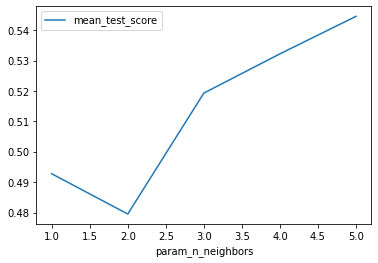

In [ ]:
# Plot results of grid search
results_knn.plot('param_n_neighbors','mean_test_score')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(X_train, y_train)
print(knn)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print ('KNN accuracy: ',acc_knn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)
KNN accuracy:  0.525


Random Forest

In [ ]:
# Base RFC model
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
print(rfc)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print ('Random forest accuracy: ',acc_rfc)

RandomForestClassifier(random_state=1)
Random forest accuracy:  0.5464444444444444


In [ ]:
# Tuning number of estimators in the ensemble method
parameters = {'n_estimators': np.arange(10,150,10)}
rfc = RandomForestClassifier(random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,29.826254,2.454580,0.393903,0.092140,140,{'n_estimators': 140},0.540476,0.552619,0.545238,0.546905,0.551905,0.547429,0.004481,1
12,28.954681,0.597557,0.398689,0.050345,130,{'n_estimators': 130},0.539762,0.550476,0.545714,0.545238,0.554762,0.547190,0.005085,2
11,26.819641,0.439269,0.400692,0.049890,120,{'n_estimators': 120},0.540476,0.549524,0.543333,0.541905,0.556190,0.546286,0.005835,3
10,24.776334,0.883617,0.367375,0.037187,110,{'n_estimators': 110},0.540476,0.550238,0.544762,0.539286,0.552857,0.545524,0.005310,4
9,22.277306,0.338911,0.355951,0.044605,100,{'n_estimators': 100},0.533571,0.547857,0.537381,0.536905,0.553095,0.541762,0.007422,5
8,20.147897,0.479284,0.340692,0.002937,90,{'n_estimators': 90},0.535952,0.542619,0.537381,0.534286,0.545952,0.539238,0.004365,6
7,18.311527,0.624091,0.299045,0.048912,80,{'n_estimators': 80},0.531190,0.533571,0.536429,0.534286,0.546429,0.536381,0.005295,7
6,16.153315,0.393964,0.261253,0.041441,70,{'n_estimators': 70},0.524048,0.536905,0.532619,0.528571,0.542857,0.533000,0.006516,8
5,13.480543,0.164458,0.262517,0.045233,60,{'n_estimators': 60},0.516905,0.529286,0.526667,0.524524,0.537857,0.527048,0.006801,9
4,11.643224,0.435631,0.239914,0.004979,50,{'n_estimators': 50},0.514048,0.530000,0.518571,0.523810,0.523333,0.521952,0.005367,10


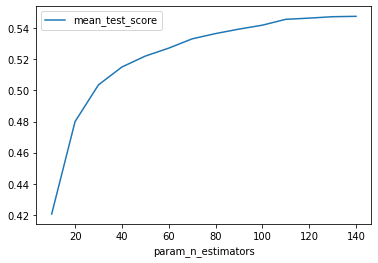

In [ ]:
# Plot results of grid search
results_rfc_gs.plot('param_n_estimators','mean_test_score')

In [ ]:
# Tuning max features
parameters = {'max_features':['sqrt',.1,.3,.5]}

rfc = RandomForestClassifier(n_estimators= 80, random_state=1, n_jobs=-1)
rfc_gs = GridSearchCV(rfc, parameters, n_jobs=-1)
rfc_gs.fit(X_train, y_train)

results_rfc_gs = pd.DataFrame(rfc_gs.cv_results_)
results_rfc_gs.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,127.252344,0.519603,0.260085,0.038590,0.3,{'max_features': 0.3},0.529762,0.537857,0.540952,0.538810,0.537381,0.536952,0.003799,1
0,18.556471,0.409548,0.221138,0.010966,sqrt,{'max_features': 'sqrt'},0.531190,0.533571,0.536429,0.534286,0.546429,0.536381,0.005295,2
1,44.536055,0.542510,0.241866,0.002493,0.1,{'max_features': 0.1},0.530714,0.546667,0.534048,0.534286,0.534048,0.535952,0.005518,3
3,197.067650,21.187857,0.256684,0.086681,0.5,{'max_features': 0.5},0.533333,0.540238,0.525476,0.536190,0.532857,0.533619,0.004845,4


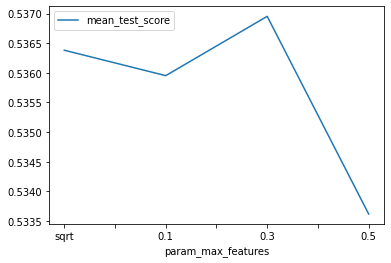

In [ ]:
# Plot results of grid search
results_rfc_gs.plot('param_max_features','mean_test_score')

In [ ]:
# Modeling RFC with best hyper-parameters
rfc = RandomForestClassifier(n_estimators=80, max_features='sqrt', random_state=1, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print ('Random forest accuracy: ',acc_rfc)

Random forest accuracy:  0.5407777777777778


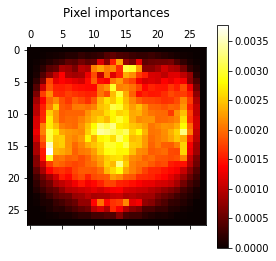

In [ ]:
# Seeing what pixels are the most important in deciding the label
importances = rfc.feature_importances_
importances = importances.reshape((28,28))
fig = plt.matshow(importances, cmap=plt.cm.hot)
plt.title('Pixel importances\n')
plt.colorbar()

Support Vector Machine

LinearSVC

In [ ]:
lsvc = LinearSVC(random_state=1)
lsvc.fit(X_train, y_train)
print(lsvc)
y_pred_lsvc = lsvc.predict(X_test)
acc_lsvc = accuracy_score(y_test, y_pred_lsvc)
print('Linear SVC accuracy: ',acc_lsvc)

LinearSVC(random_state=1)
Linear SVC accuracy:  0.45011111111111113


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Non-Linear SVM (Radial Basis Function)

In [ ]:
svc = SVC(kernel='rbf', random_state=1) 
svc.fit(X_train, y_train)
print(svc)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
print ('Gaussian Radial Basis Function SVC Accuracy: ',acc_svc)

SVC(random_state=1)
Gaussian Radial Basis Function SVC Accuracy:  0.6021111111111112


Multi-Layer Perceptron

In [3]:
# Base model
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
print(mlp)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print ('mlp accuracy: ',acc_mlp)

MLPClassifier(random_state=1)
mlp accuracy:  0.48044444444444445


In [4]:
parameters = {'hidden_layer_sizes' : [(100,),(784,), (100,100),(100,100,100)] }

mlp = MLPClassifier(random_state=1)
mlp = GridSearchCV(mlp, parameters, n_jobs=-1)
mlp.fit(X_train, y_train)

results=pd.DataFrame(mlp.cv_results_)
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,293.567959,54.294678,0.317046,0.013373,"(784,)","{'hidden_layer_sizes': (784,)}",0.555952,0.543571,0.539286,0.553810,0.566190,0.551762,0.009515,1
3,60.719426,4.900324,0.057476,0.009549,"(100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100)}",0.517143,0.524048,0.520476,0.514762,0.500238,0.515333,0.008171,2
2,87.222477,7.497719,0.057551,0.002521,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",0.506429,0.499286,0.501429,0.507857,0.502143,0.503429,0.003207,3
0,118.824872,5.485099,0.048973,0.002490,"(100,)","{'hidden_layer_sizes': (100,)}",0.494286,0.489762,0.501429,0.479524,0.495714,0.492143,0.007328,4


In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(784,),random_state=1)
mlp.fit(X_train, y_train)
print(mlp)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print ('mlp accuracy: ',acc_mlp)

MLPClassifier(hidden_layer_sizes=(784,), random_state=1)
mlp accuracy:  0.5696666666666667


Convolutional Neural Networks (CNN / ConvNet)

In [6]:
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [7]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

# reshape to be [samples][width][height][pixels] 
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation='relu',input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

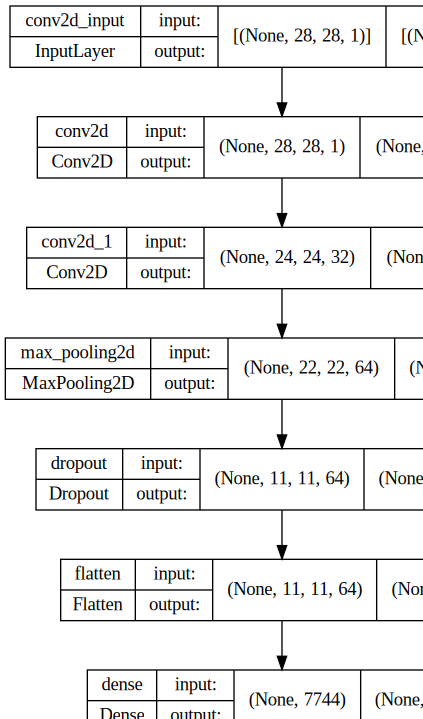

In [9]:
SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
cnn_model = model.fit(X_train_cnn, y_train_cnn,
          batch_size=32,
          epochs=20,
          validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/20
657/657 [==============================] - 15s 5ms/step - loss: 1.4879 - accuracy: 0.4943 - val_loss: 1.0987 - val_accuracy: 0.6253
Epoch 2/20
657/657 [==============================] - 3s 5ms/step - loss: 1.1662 - accuracy: 0.6116 - val_loss: 0.9923 - val_accuracy: 0.6608
Epoch 3/20
657/657 [==============================] - 3s 5ms/step - loss: 1.0572 - accuracy: 0.6413 - val_loss: 0.9806 - val_accuracy: 0.6680
Epoch 4/20
657/657 [==============================] - 3s 5ms/step - loss: 0.9640 - accuracy: 0.6773 - val_loss: 0.9644 - val_accuracy: 0.6783
Epoch 5/20
657/657 [==============================] - 4s 6ms/step - loss: 0.8974 - accuracy: 0.6945 - val_loss: 0.9161 - val_accuracy: 0.6890
Epoch 6/20
657/657 [==============================] - 3s 5ms/step - loss: 0.8278 - accuracy: 0.7123 - val_loss: 0.9087 - val_accuracy: 0.6966
Epoch 7/20
657/657 [==============================] - 3s 5ms/step - loss: 0.7540 - accuracy: 0.7371 - val_loss: 0.9288 - val_accuracy: 0.6988
Epoch

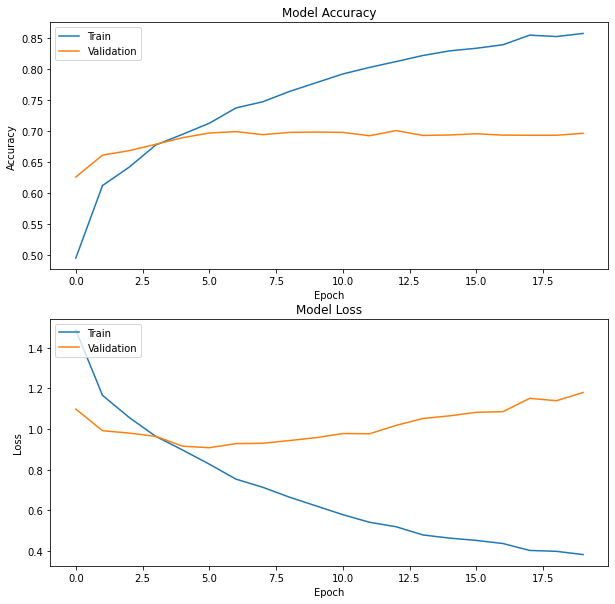

In [17]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)
ax1 = plt.plot(cnn_model.history['accuracy'])
ax1 = plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

ax2 = plt.subplot(2,1,2)
ax2 = plt.plot(cnn_model.history['loss'])
ax2 = plt.plot(cnn_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
cnn_score = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)

282/282 [==============================] - 1s 4ms/step - loss: 1.1801 - accuracy: 0.6961


In [19]:
print('Test Loss:', cnn_score[0])
print('Test Accuracy:', cnn_score[1])

Test Loss: 1.180083990097046
Test Accuracy: 0.6961110830307007


In [22]:
# y_pred_cnn = model.predict_classes(X_test_cnn, verbose=0)
predict_x=model.predict(X_test_cnn) 
y_pred_cnn=np.argmax(predict_x,axis=1)

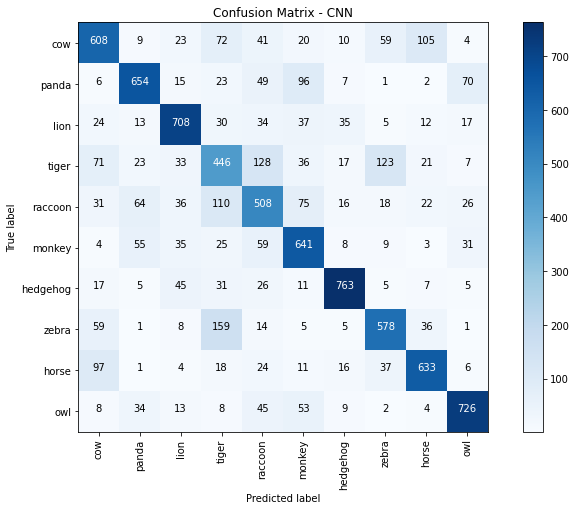

In [32]:
import itertools

# Create a dict with label codes
label_dict = {0:'cow', 1:'panda', 2:'lion', 3:'tiger', 4:'raccoon', 5:'monkey', 6:'hedgehog', 7:'zebra', 8:'horse', 9:'owl'}

# Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_cnn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
fig = plt.figure(figsize=(10,7))
fig = plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
_ =plt.title('Confusion Matrix - CNN')
_ = plt.colorbar()
_ = tick_marks = np.arange(len(label_dict))
_ = plt.xticks(tick_marks, label_dict.values(), rotation=90)
_ = plt.yticks(tick_marks, label_dict.values())
_ = plt.tight_layout()
_ = plt.ylabel('True label')
_ = plt.xlabel('Predicted label')
thresh = cf_matrix.max() / 2.
for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])):
    plt.text(j, i, cf_matrix[i, j], horizontalalignment="center",
                color="white" if cf_matrix[i, j] > thresh else "black")

Using the Model for Predicting

In [46]:
test_image = np.expand_dims(X_test_cnn[0], axis=3)
test_image = test_image.reshape(1,28, 28,1)

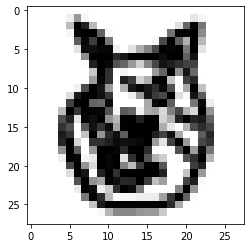

In [47]:
plt.imshow(X_test_cnn[0][:,:,0], cmap=plt.get_cmap('binary'))

In [48]:
print(label_dict,# Dictionary to match label with code
      '\n','\n',
      y_test_cnn[0],# True/False (1/0) of label. Code = position of True
      '\n','\n',
      np.where(y_test_cnn[0] == 1)) # The code 

{0: 'cow', 1: 'panda', 2: 'lion', 3: 'tiger', 4: 'raccoon', 5: 'monkey', 6: 'hedgehog', 7: 'zebra', 8: 'horse', 9: 'owl'} 
 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 
 
 (array([3]),)


In [49]:
# model.predict_classes(test_image,batch_size=1)
# (model.predict(test_image,batch_size=1) > 0.5).astype("int32")
predict=model.predict(test_image,batch_size=1) 
np.argmax(predict,axis=1)

array([3])

Patterns Uncovered in Hidden Layers - Sword

In [50]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [51]:
def display_activations(activation_maps):
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        plt.figure(figsize=(25,10))
        plt.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [52]:
activations = get_activations(model, test_image)

----- activations -----


ValueError: ignored

In [ ]:
display_activations(activations)

Transfer Learning - VGG16

In [56]:
# from keras import applications
from tensorflow.keras import applications
from skimage.transform import resize
import cv2

batch_size = 128
num_classes = 10
epochs = 50

vgg_model = applications.vgg16.VGG16(weights='imagenet', include_top=False)
vgg_model.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

X_Train

In [57]:
# Resize the heighth and width to meet the minimum - X_train
resized_train = np.empty((0,56,56))

for line in X_train_cnn:
    img = cv2.resize(line, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    resized_train = np.append(resized_train, [img], axis=0)
    
# Turn grayscale into RGB
X_train_tl = np.stack((resized_train,)*3, -1)
    
bottleneck_features_train = vgg_model.predict(X_train_tl,verbose=1)

657/657 [==============================] - 20s 29ms/step


X_Test

In [58]:
# Resize the heighth and width to meet the minimum - X_test
resized_test = np.empty((0,56,56))

for line in X_test_cnn:
    img = cv2.resize(line, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    resized_test = np.append(resized_test, [img], axis=0)
    
# Turn grayscale into RGB
X_test_tl = np.stack((resized_test,)*3, -1)

bottleneck_features_test = vgg_model.predict(X_test_tl,verbose=1)

282/282 [==============================] - 10s 34ms/step


In [59]:
clf_model = Sequential()
clf_model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
clf_model.add(Dense(512, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(256, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(num_classes, activation='softmax'))

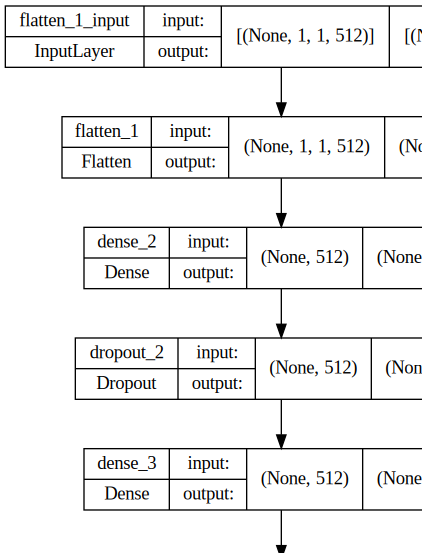

In [60]:
SVG(model_to_dot(clf_model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

In [63]:
import tensorflow as tf
clf_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [65]:
clf_model.fit(bottleneck_features_train, y_train_cnn,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/50
165/165 [==============================] - 2s 13ms/step - loss: 2.4837 - accuracy: 0.1064
Epoch 2/50
165/165 [==============================] - 1s 3ms/step - loss: 2.4834 - accuracy: 0.1043
Epoch 3/50
165/165 [==============================] - 1s 8ms/step - loss: 2.4645 - accuracy: 0.1097
Epoch 4/50
165/165 [==============================] - 1s 3ms/step - loss: 2.4569 - accuracy: 0.1071
Epoch 5/50
165/165 [==============================] - 3s 16ms/step - loss: 2.4393 - accuracy: 0.1147
Epoch 6/50
165/165 [==============================] - 1s 3ms/step - loss: 2.4324 - accuracy: 0.1148
Epoch 7/50
165/165 [==============================] - 1s 4ms/step - loss: 2.4222 - accuracy: 0.1158
Epoch 8/50
165/165 [==============================] - 1s 7ms/step - loss: 2.4216 - accuracy: 0.1121
Epoch 9/50
165/165 [==============================] - 1s 3ms/step - loss: 2.4100 - accuracy: 0.1143
Epoch 10/50
165/165 [==============================] - 1s 8ms/step - loss: 2.4056 - accuracy: 0.11

Predict and Test Model Performance

In [66]:
vgg16_score = clf_model.evaluate(bottleneck_features_test, y_test_cnn, verbose=1)

282/282 [==============================] - 1s 3ms/step - loss: 2.1292 - accuracy: 0.3854


In [67]:
print('Test loss:', vgg16_score[0])
print('Test accuracy:', vgg16_score[1])

Test loss: 2.1292178630828857
Test accuracy: 0.38544443249702454


Results

In [68]:
print('KNN accuracy: ',acc_knn,
      '\n',
      'Random forest accuracy: ',acc_rfc,
      '\n',
      'Linear SVC accuracy: ',acc_lsvc,
      '\n',
      'Gaussian Radial Basis Function SVC Accuracy: ',acc_svc,
      '\n',
      'Multi-Layer Perceptron accuracy: ',acc_mlp,
      '\n',
      'Convolutional Neural Network Score:',cnn_score[1],
      '\n', 
      'Transfer Learning Score (VGG16)', vgg16_score[1]
     )

NameError: ignored